Answer: 1

In [2]:
import pandas as pd

# Assuming the data is in an Excel file named 'Tumblr_valuation.xlsx'
file_path = '/Users/nick/Desktop/Course work/Digital transformation and value creation/Tumblr_valuation .xlsx'  # Replace with the actual file path
sheet_name = 'Exhibit 1'  # Replace with the actual sheet name

# Read data from Exhibit 1 sheet, starting from the 6th row to get the correct header
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=5)

# Check if DataFrame is not empty
if not df.empty:
    # Drop rows with NaN values in the 'People' column
    df = df.dropna(subset=['People'])

    # Extract relevant columns for the growth rate calculation
    beginning_value = df['People'].iloc[0]
    ending_value = df['People'].iloc[-1]
    number_of_months = len(df) - 1  # Number of months is the length of the DataFrame minus 1

    # Check if beginning_value is not zero to avoid division by zero
    if beginning_value != 0:
        # Calculate average monthly growth rate
        average_growth_rate = ((ending_value / beginning_value) ** (1 / number_of_months)) - 1

        # Display average growth rate
        print(f"Average Monthly Growth Rate: {average_growth_rate:.2%}")
    else:
        print("Beginning value is zero. Unable to calculate growth rate.")
else:
    print("DataFrame is empty. Please check your data.")

Average Monthly Growth Rate: 5.47%


In [3]:
# Extract relevant columns for the growth rate calculation
beginning_value = df['People'].iloc[0]
ending_value = df['People'].iloc[-1]
number_of_months = len(df) - 1  # Number of months is the length of the DataFrame minus 1

    # Check if beginning_value is not zero to avoid division by zero
if beginning_value != 0:
        # Calculate average monthly growth rate
        average_growth_rate = ((ending_value / beginning_value) ** (1 / number_of_months)) - 1

        # Project growth rate for the next ~10 years
        projected_months = 115 
        projected_value = ending_value * (1 + average_growth_rate) ** projected_months

        # Display projected value
        print(f"Projected number of people accessing Tumblr's site in December 2022: {projected_value:.0f}")
else:    
        print("Beginning value is zero. Unable to calculate growth rate.")

Projected number of people accessing Tumblr's site in December 2022: 62392729685


/var/folders/rk/bd25l14n4p7br8rxr3c4rxgc0000gn/T/ipykernel_26737/4213882290.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2013-05-01', periods=months + 1, freq='M')


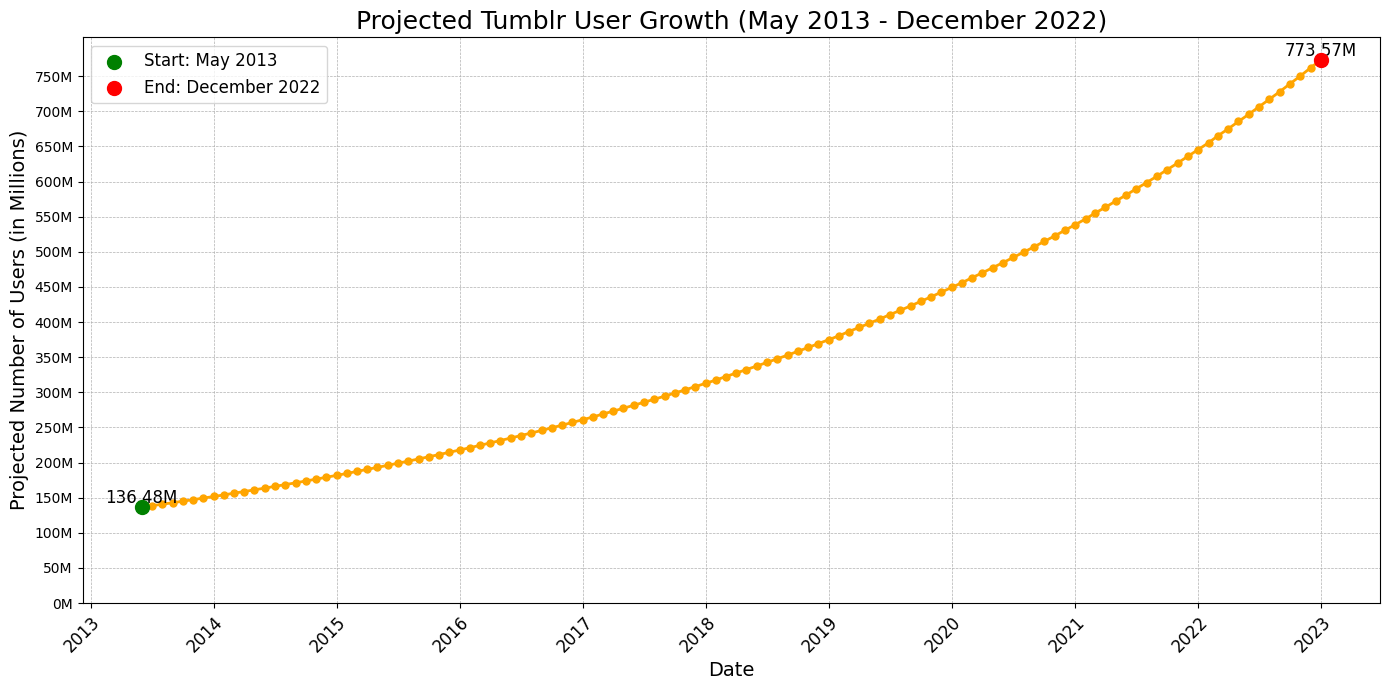

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Constants
initial_users = 136477904  # Initial user count
monthly_growth_rate = 0.0152  # Monthly growth
months = 115  # Time span in months

# Projected users for December 2022
projected_users_dec_2022 = initial_users * ((1 + monthly_growth_rate) ** months)

# Dates from May 2013 to December 2022
dates = pd.date_range(start='2013-05-01', periods=months + 1, freq='M')

# Monthly projected user counts
projected_users = [initial_users * ((1 + monthly_growth_rate) ** month) for month in range(months + 1)]

# Plot setup
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting
ax.plot(dates, np.array(projected_users) / 1000000, marker='o', linestyle='-', color='orange', linewidth=2, markersize=5)

# Starting and ending points
ax.scatter(dates[0], projected_users[0] / 1000000, color='green', s=100, label='Start: May 2013', zorder=5)
ax.scatter(dates[-1], projected_users[-1] / 1000000, color='red', s=100, label='End: December 2022', zorder=5)

# Start and end labels
start_value = f"{initial_users/1000000:.2f}M"
end_value = f"{projected_users_dec_2022/1000000:.2f}M"
ax.text(dates[0], projected_users[0] / 1000000, start_value, fontsize=12, verticalalignment='bottom', horizontalalignment='center')
ax.text(dates[-1], projected_users[-1] / 1000000, end_value, fontsize=12, verticalalignment='bottom', horizontalalignment='center')

# Title and labels
ax.set_title('Projected Tumblr User Growth (May 2013 - December 2022)', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Projected Number of Users (in Millions)', fontsize=14)

# Grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(fontsize=12)

# Rotate date labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=12)

# Y-axis ticks and labels
max_users_millions = max(projected_users) / 1000000
y_ticks = np.arange(0, max_users_millions, 50)  # Every 50 million users
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:.0f}M'.format(y) for y in y_ticks])

# Adjust layout
plt.tight_layout()

# Display plot
plt.show()

Answer-3

In [3]:
pip install tbats


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Loading libraries 
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tbats import TBATS
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

file_path_exhibit1 = '/Users/nick/Desktop/Course work/Digital transformation and value creation/Tumblr_valuation .xlsx'  
sheet_name_exhibit1 = 'Exhibit 1' 
sheet_name_exhibit5 = 'Exhibit 5'

# Exhibit 1 sheet, starting from the 6th row to get the correct header
df_exhibit1 = pd.read_excel(file_path_exhibit1, sheet_name=sheet_name_exhibit1, skiprows=5)

if not df_exhibit1.empty:
    df_exhibit1 = df_exhibit1.dropna(subset=['People']) #Cleaning NAN
    dates = pd.to_datetime(df_exhibit1['Date']) # Date
    values = df_exhibit1['People'] 

   # Exponential smoothing
    model_exponential_smoothing = ExponentialSmoothing(values, trend='add', seasonal=None)

    # Fit the exponential smoothing model to the data
    model_fit_exponential_smoothing = model_exponential_smoothing.fit()

    # TBATS model
    model_tbats = TBATS(seasonal_periods=(12,))

    # Fit the TBATS model to the data
    model_fit_tbats = model_tbats.fit(values)
    forecast_dates = pd.date_range(start='2013-06-01', end='2022-12-01', freq='M')
    forecast_periods = len(forecast_dates)

    # Forecasting setup
    future_dates = pd.date_range(start=dates.max() + pd.DateOffset(months=1), periods=forecast_periods, freq='M')

    # Forecast using the exponential smoothing model
    forecast_values_exponential_smoothing = model_fit_exponential_smoothing.forecast(forecast_periods)

    # Forecast using the TBATS model
    forecast_values_tbats = model_fit_tbats.forecast(steps=forecast_periods)

    # Combine historical and forecasted data for the exponential smoothing model
    combined_df_exponential_smoothing = pd.concat([df_exhibit1, pd.DataFrame({'Date': future_dates, 'People': forecast_values_exponential_smoothing})])

    # Combining historical and forecasted data for the TBATS model
    combined_df_tbats = pd.concat([df_exhibit1, pd.DataFrame({'Date': future_dates, 'People': forecast_values_tbats})])

    # Display
    print("Combined DataFrame with Historical and Forecasted Values (Exponential Smoothing Model):")
    print(combined_df_exponential_smoothing)


    # Display the forecasted values for the TBATS model
    print("Combined DataFrame with Historical and Forecasted Values (TBATS Model):")
    print(combined_df_tbats)

    # Exhibit 5 sheet, starting from the 6th row to get the correct header
    df_exhibit5 = pd.read_excel(file_path_exhibit1, sheet_name=sheet_name_exhibit5, skiprows=5)

    # 'Forecasts' is starting from cell 'M6' in Exhibit 5
    actual_values_exhibit5 = df_exhibit5['Forecasts'].iloc[5:].values

    # Extract forecasted values from combined_df_tbats
    forecasted_values_tbats = combined_df_tbats['People'].iloc[-len(actual_values_exhibit5):].values

    # Metrics for TBATS model
    mae_tbats = mean_absolute_error(actual_values_exhibit5, forecasted_values_tbats)
    mse_tbats = mean_squared_error(actual_values_exhibit5, forecasted_values_tbats)
    rmse_tbats = np.sqrt(mse_tbats)

    # Display the evaluation metrics for TBATS model
    print("Goodness of Fit for TBATS Model:")
    print(f"Mean Absolute Error (MAE): {mae_tbats}")
    print(f"Mean Squared Error (MSE): {mse_tbats}")
    print(f"Root Mean Squared Error (RMSE): {rmse_tbats}")
else:
    print("DataFrame is empty. Please check your data.")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Combined DataFrame with Historical and Forecasted Values (Exponential Smoothing Model):
                    Date     Uniques        People       Visits    Page Views  \
0    2010-04-01 00:00:00  25349036.0  1.902012e+07   69837544.0  1.015762e+09   
1    2010-05-01 00:00:00  28001532.0  2.109669e+07   75802128.0  1.061456e+09   
2    2010-06-01 00:00:00  30279004.0  2.249690e+07   86279520.0  1.265348e+09   
3    2010-07-01 00:00:00  33237588.0  2.457115e+07   96291688.0  1.470884e+09   
4    2010-08-01 00:00:00  37326484.0  2.774468e+07  105718912.0  1.664431e+09   
..                   ...         ...           ...          ...           ...   
147  2022-07-31 00:00:00         NaN  3.878001e+08          NaN           NaN   
148  2022-08-31 00:00:00         NaN  3.900847e+08          NaN           NaN   
149  2022-09-30 00:00:00         NaN  3.923692e+08          NaN           NaN   
150  2022-10-31 00:00:00         NaN  3.946537e+08          NaN           NaN   
151  2022-11-30 00:00

/var/folders/rk/bd25l14n4p7br8rxr3c4rxgc0000gn/T/ipykernel_26737/3218886715.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2013-06-01', end='2022-12-01', freq='M')
/var/folders/rk/bd25l14n4p7br8rxr3c4rxgc0000gn/T/ipykernel_26737/3218886715.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=dates.max() + pd.DateOffset(months=1), periods=forecast_periods, freq='M')


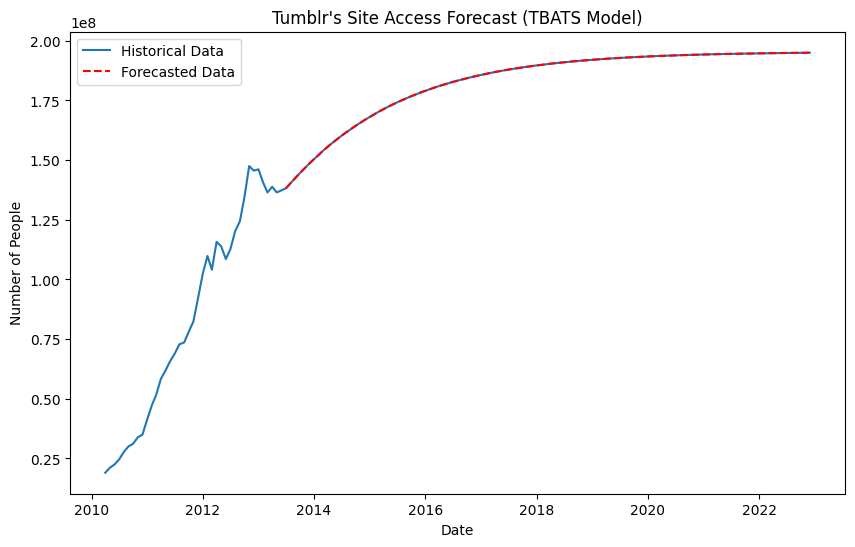

In [5]:
# Set up the plot
plt.figure(figsize=(10, 6))
# Plot historical data
plt.plot(combined_df_tbats['Date'], combined_df_tbats['People'], label='Historical Data')
# Plot forecasted data
plt.plot(future_dates, forecast_values_tbats, label='Forecasted Data', linestyle='dashed', color='red')
plt.title("Tumblr's Site Access Forecast (TBATS Model)")
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()

# Display
plt.show()

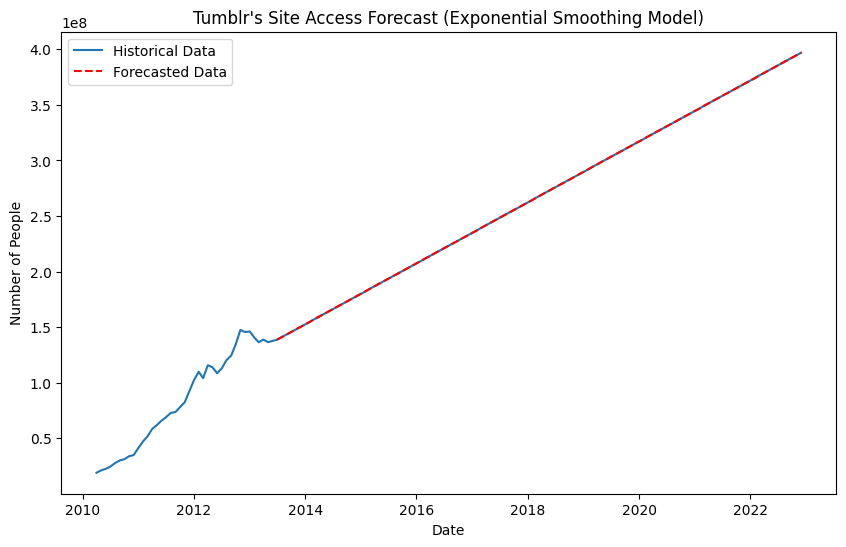

In [6]:
# Plotting the forecasted values for exponential smoothing model
plt.figure(figsize=(10, 6))
plt.plot(combined_df_exponential_smoothing['Date'], combined_df_exponential_smoothing['People'], label='Historical Data')
plt.plot(future_dates, forecast_values_exponential_smoothing, label='Forecasted Data', linestyle='dashed', color='red')
plt.title("Tumblr's Site Access Forecast (Exponential Smoothing Model)")
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values for evaluation
actual_values_exhibit5 = df_exhibit5['Forecasts'].iloc[5:].values

# Extract forecasted values from combined_df
forecasted_values_exp_smoothing = combined_df_exponential_smoothing['People'].iloc[-len(actual_values_exhibit5):].values

# Calculate evaluation metrics for Exponential Smoothing model
mae_exp_smoothing = mean_absolute_error(actual_values_exhibit5, forecasted_values_exp_smoothing)
mse_exp_smoothing = mean_squared_error(actual_values_exhibit5, forecasted_values_exp_smoothing)
rmse_exp_smoothing = np.sqrt(mse_exp_smoothing)

# Display the evaluation metrics for Exponential Smoothing model
print("Goodness of Fit for Exponential Smoothing Model:")
print(f"Mean Absolute Error (MAE): {mae_exp_smoothing}")
print(f"Mean Squared Error (MSE): {mse_exp_smoothing}")
print(f"Root Mean Squared Error (RMSE): {rmse_exp_smoothing}")

Goodness of Fit for Exponential Smoothing Model:
Mean Absolute Error (MAE): 271288705.197056
Mean Squared Error (MSE): 7.895584114512989e+16
Root Mean Squared Error (RMSE): 280990820.3929977


Answer: 5 

Using API key to Search "Tumblr Statistics" to find details about Tumblr

In [8]:
import requests
import pandas as pd

# setting up the request parameters
params = {
    'api_key': '1355D61462CA484CBCF0D2B853B3B979',
    'q': 'Tumblr Statistics',
    'engine': 'google'
}

# making the http GET request to SerpWow
api_result = requests.get('https://api.serpwow.com/search', params=params)

# Parse the JSON response
response_json = api_result.json()

# Checking if 'organic_results' is in the response
if 'organic_results' in response_json:
    results = response_json['organic_results']
else:
    results = []

# preparing the data for the table, using .get() to avoid KeyError
data = {
    'Title': [result.get('title', 'No Title') for result in results],
    'Link': [result.get('link', 'No Link') for result in results],
    'Snippet': [result.get('snippet', 'No Snippet') for result in results]
}

# creating a DataFrame
df = pd.DataFrame(data)

# display the table
print(df)


                                               Title  \
0                     Tumblr statistics for any blog   
1                        Tumblr - Statistics & Facts   
2  Must-Know Tumblr Statistics & Trends [Recent A...   
3  59+ Tumblr Statistics For 2024 (Demographics &...   
4  Number of Tumblr Blogs in 2024: User Demograph...   
5  40+ Tumblr Statistics, Facts, and Demographics...   
6  60+ Stunning Tumblr Statistics You Need to Kno...   
7  Tumblr Statistics — Users, Revenue and Growth ...   
8  Tumblr Statistics | Updated News, Trends & Dem...   
9  tumblr.com Traffic Analytics, Ranking Stats & ...   

                                                Link  \
0               https://jetblackcode.com/TumblrStats   
1       https://www.statista.com/topics/2463/tumblr/   
2              https://gitnux.org/tumblr-statistics/   
3      https://www.demandsage.com/tumblr-statistics/   
4  https://financesonline.com/number-of-tumblr-bl...   
5         https://cloudincome.com/tumblr-statis

Using one of the source got from above code to scrape details 59+ Tumblr Statistics For 2024 Demographics &..https://www.demandsage.com/tumblr-statistics/ 

In [9]:
# Importing necessary libraries
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Adjusting display settings for pandas DataFrames
pd.set_option('display.max_rows', None)  # Display an unlimited number of rows
pd.set_option('display.max_columns', None)  # Display an unlimited number of columns
pd.set_option('display.width', None)  # Use maximum width for displaying columns
pd.set_option('display.max_colwidth', None)  # Display full content of each column

# Setting up WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Navigating to the webpage
driver.get('https://www.demandsage.com/tumblr-statistics/')

wait = WebDriverWait(driver, 10)

# Function to scrape a table and return its data and title
def scrape_table(table_xpath, default_title, columns):
    table = wait.until(EC.presence_of_element_located((By.XPATH, table_xpath + '//table')))
    rows = table.find_elements(By.XPATH, './tbody/tr')
    data = []
    for row in rows:
        cells = row.find_elements(By.XPATH, './td')
        row_data = [cell.text for cell in cells]
        data.append(row_data)
    
    # Attempting to locate the table title
    try:
        title = driver.find_element(By.XPATH, table_xpath + '/figcaption').text
    except:
        title = default_title  

    return data, title, columns

# Table XPaths, titles, and column names
tables_info = [
    {'xpath': '//*[@id="post-13104"]/div/div/figure[1]', 'title': "Number of Blogs", 'columns': ['Year', 'Cumulative Tumblr Blogs']},
    {'xpath': '//*[@id="post-13104"]/div/div/figure[2]', 'title': "Demographic Information", 'columns': ['Category', 'Percentage']},
    {'xpath': '//*[@id="post-13104"]/div/div/figure[3]', 'title': "Tumblr Users Growth from 2014 to 2020", 'columns': ['Year', 'Growth Percentage']},
    {'xpath': '//*[@id="post-13104"]/div/div/figure[8]', 'title': "Tumblr Traffic from 2018 to 2023", 'columns': ['Year', 'Visitors (in millions)']},
]

# Iterate over the tables and scrape data
for table_info in tables_info:
    data, title, columns = scrape_table(table_info['xpath'], table_info['title'], table_info['columns'])
    df = pd.DataFrame(data, columns=columns if data else None)
    print(title)
    print(df)
    print("\n")

driver.quit()

Number of Blogs
    Year Cumulative Tumblr Blogs
0   2024            519 million 
1   2023             572 million
2   2020           496.1 million
3   2019           480.1 million
4   2018           441.4 million
5   2017             373 million
6   2016           319.8 million
7   2015           260.5 million
8   2014           207.3 million
9   2013           141.4 million
10  2012           76.4  million
11  2011            17.5 million


Demographic Information
  Category    Percentage
0     Year  Tumblr Users
1     2014  18.2 million
2     2015    21 million
3     2016  23.2 million
4     2017  25.2 million
5     2018  26.9 million
6     2019  28.3 million
7     2020  29.4 million


Tumblr Users Growth from 2014 to 2020
   Year              Growth Percentage
0  Year  Growth Of The Number Of Users
1  2014                          32.8%
2  2015                          15.4%
3  2016                          10.5%
4  2017                           8.6%
5  2018                       

Using API key to Search "The World's Largest Social Networks 2013" to find more details about Tumblr

In [13]:
import requests
import pandas as pd

# setting up the request parameters
params = {
    'api_key': '1355D61462CA484CBCF0D2B853B3B979',
    'q': "The World's Largest Social Networks 2013",
    'engine': 'google'
}

# making the http GET request to SerpWow
api_result = requests.get('https://api.serpwow.com/search', params=params)

# Parse the JSON response
response_json = api_result.json()

# Checking if 'organic_results' is in the response
if 'organic_results' in response_json:
    results = response_json['organic_results']
else:
    results = []

# preparing the data for the table, using .get() to avoid KeyError
data = {
    'Title': [result.get('title', 'No Title') for result in results],
    'Link': [result.get('link', 'No Link') for result in results],
    'Snippet': [result.get('snippet', 'No Snippet') for result in results]
}

# creating a DataFrame
df = pd.DataFrame(data)

# displaying the table
print(df)


                                                        Title  \
0                         The World's Largest Social Networks   
1                    The Largest Social Networks in the World   
2  Chart: Half of the World's Online Population Uses Facebook   
3                                    Social Media Update 2013   
4     A Rapidly Social World – 2013 Stats for Social Networks   
5          Top 10 most popular social networking sites - 2013   
6                     28 Top Social Media Platforms Worldwide   
7                       1.6 billion people on social networks   

                                                                                Link  \
0         https://www.businessinsider.com/the-worlds-largest-social-networks-2013-12   
1   https://www.businessinsider.com/the-largest-social-networks-in-the-world-2013-12   
2             https://www.statista.com/chart/1103/top-10-social-networks-in-q1-2013/   
3          https://www.pewresearch.org/internet/2013/12/30/soc

Using one of the source got from above code to scrape details "The Largest Social Networks in the World" - https://www.businessinsider.com/the-largest-so

In [15]:
# Importing necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Initialize Chrome WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open the web page
driver.get("https://www.businessinsider.com/the-worlds-largest-social-networks-2013-12?r=US&IR=T")

# Explicitly wait for the element to be present before accessing it
wait = WebDriverWait(driver, 20)  # Wait for up to 10 seconds
ol_xpath = '//*[@id="piano-inline-content-wrapper"]/div/div/div/ol[1]'
ordered_list = wait.until(EC.presence_of_element_located((By.XPATH, ol_xpath)))

# Retrieve all list items within the ordered list
list_items = ordered_list.find_elements(By.TAG_NAME, 'li')

# Iterate over the list items and extract the text
social_networks = []
for li in list_items:
    social_networks.append(li.text)

# Close the browser
driver.quit()
print("The ranking 2013 (Ranked in terms of reported or estimated global Monthly Active Users or MAUs")
# Print the extracted social networks
for network in social_networks:
    print(network)


The ranking 2013 (Ranked in terms of reported or estimated global Monthly Active Users or MAUs
Facebook (1.15 billion MAUs)
YouTube (1 billion MAUs)
Qzone (712 million total users), China
Sina Weibo (500 million total users), China
WhatsApp (350 million MAUs)
Google+ (327 million MAUs)
Tumblr (300 million monthly unique visitors)
LINE (275 million total active users), Japan
Twitter (240 million MAUs)
WeChat (236 million MAUs), China
Tencent Weibo, (220 million MAUs), China
LinkedIn, (184 million MAUs)
Youku, (175 million MAUs)
Instagram, (150 million MAUs)
Tudou, (114 million MAUs), China
RenRen, (54 million MAUs), China
Pinterest, (50 million MAUs)
Badoo, (45 million MAUs), Cyprus
Orkut, (44 million MAUs)
Foursquare, (40 million MAUs)
Vine, (40 million MAUs)
vkontakte, (31 million MAUs), Russia
Myspace, (30 million MAUs)
Snapchat (20 million MAUs in the U.S.*)


Answer-6

In [16]:
import pandas as pd

# Lexicon for 'Number of Blogs' dataset
lexicon_number_of_blogs = pd.DataFrame({
    'Feature Name': ['Year', 'Cumulative Tumblr Blogs'],
    'Description': ['The year when the data was recorded', 
                    'The total number of blogs on Tumblr up to that year'],
    'Units': ['YYYY', 'Count (Million)']
})

# Lexicon for 'Demographic Information' dataset
lexicon_demographic_information = pd.DataFrame({
    'Feature Name': ['Category', 'Percentage'],
    'Description': ['The demographic category or year', 
                    'The percentage of Tumblr users within the category'],
    'Units': ['Text or YYYY', 'Percentage (%)']
})

# Lexicon for 'Tumblr Users Growth from 2014 to 2020' dataset
lexicon_users_growth = pd.DataFrame({
    'Feature Name': ['Year', 'Growth Percentage'],
    'Description': ['The year when the growth percentage was recorded', 
                    'The year-over-year percentage growth in the number of users'],
    'Units': ['YYYY', 'Percentage (%)']
})

# Lexicon for 'Tumblr Traffic from 2018 to 2023' dataset
lexicon_traffic = pd.DataFrame({
    'Feature Name': ['Year', 'Visitors (in millions)'],
    'Description': ['The year when the traffic data was recorded', 
                    'The estimated number of visitors to Tumblr\'s site'],
    'Units': ['YYYY', 'Count (Million)']
})


In [17]:
# Print lexicons
print("Lexicon for 'Number of Blogs' Dataset:")
lexicon_number_of_blogs

Lexicon for 'Number of Blogs' Dataset:


,Feature Name,Description,Units
0,Year,The year when the data was recorded,YYYY
1,Cumulative Tumblr Blogs,The total number of blogs on Tumblr up to that year,Count (Million)


In [18]:
# Print lexicons
print("Lexicon for 'Demographic Information' Dataset:")
lexicon_demographic_information

Lexicon for 'Demographic Information' Dataset:


,Feature Name,Description,Units
0,Category,The demographic category or year,Text or YYYY
1,Percentage,The percentage of Tumblr users within the category,Percentage (%)


In [19]:
# Print lexicons
print("Lexicon for 'Tumblr Users Growth from 2014 to 2020' Dataset:")
lexicon_users_growth

Lexicon for 'Tumblr Users Growth from 2014 to 2020' Dataset:


,Feature Name,Description,Units
0,Year,The year when the growth percentage was recorded,YYYY
1,Growth Percentage,The year-over-year percentage growth in the number of users,Percentage (%)


In [20]:
# Print lexicons
print("Lexicon for 'Tumblr Traffic from 2018 to 2023' Dataset:")
lexicon_traffic

Lexicon for 'Tumblr Traffic from 2018 to 2023' Dataset:


,Feature Name,Description,Units
0,Year,The year when the traffic data was recorded,YYYY
1,Visitors (in millions),The estimated number of visitors to Tumblr's site,Count (Million)


In [21]:
import pandas as pd

# Lexicon for 'Social Media Ranking' dataset
lexicon_social_media_ranking = pd.DataFrame({
    'Feature Name': ['Platform', 'Monthly Active Users (MAUs)'],
    'Description': ['Name of the social media platform', 
                    'The number of active users accessing the platform per month', 
                    ],
    'Units': ['Text', 'Count (Millions)']
})

# Display the lexicon for 'Social Media Ranking' dataset
print("Social networks and their MAUs 2013:")
lexicon_social_media_ranking


Social networks and their MAUs 2013:


,Feature Name,Description,Units
0,Platform,Name of the social media platform,Text
1,Monthly Active Users (MAUs),The number of active users accessing the platform per month,Count (Millions)


Answer 7

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

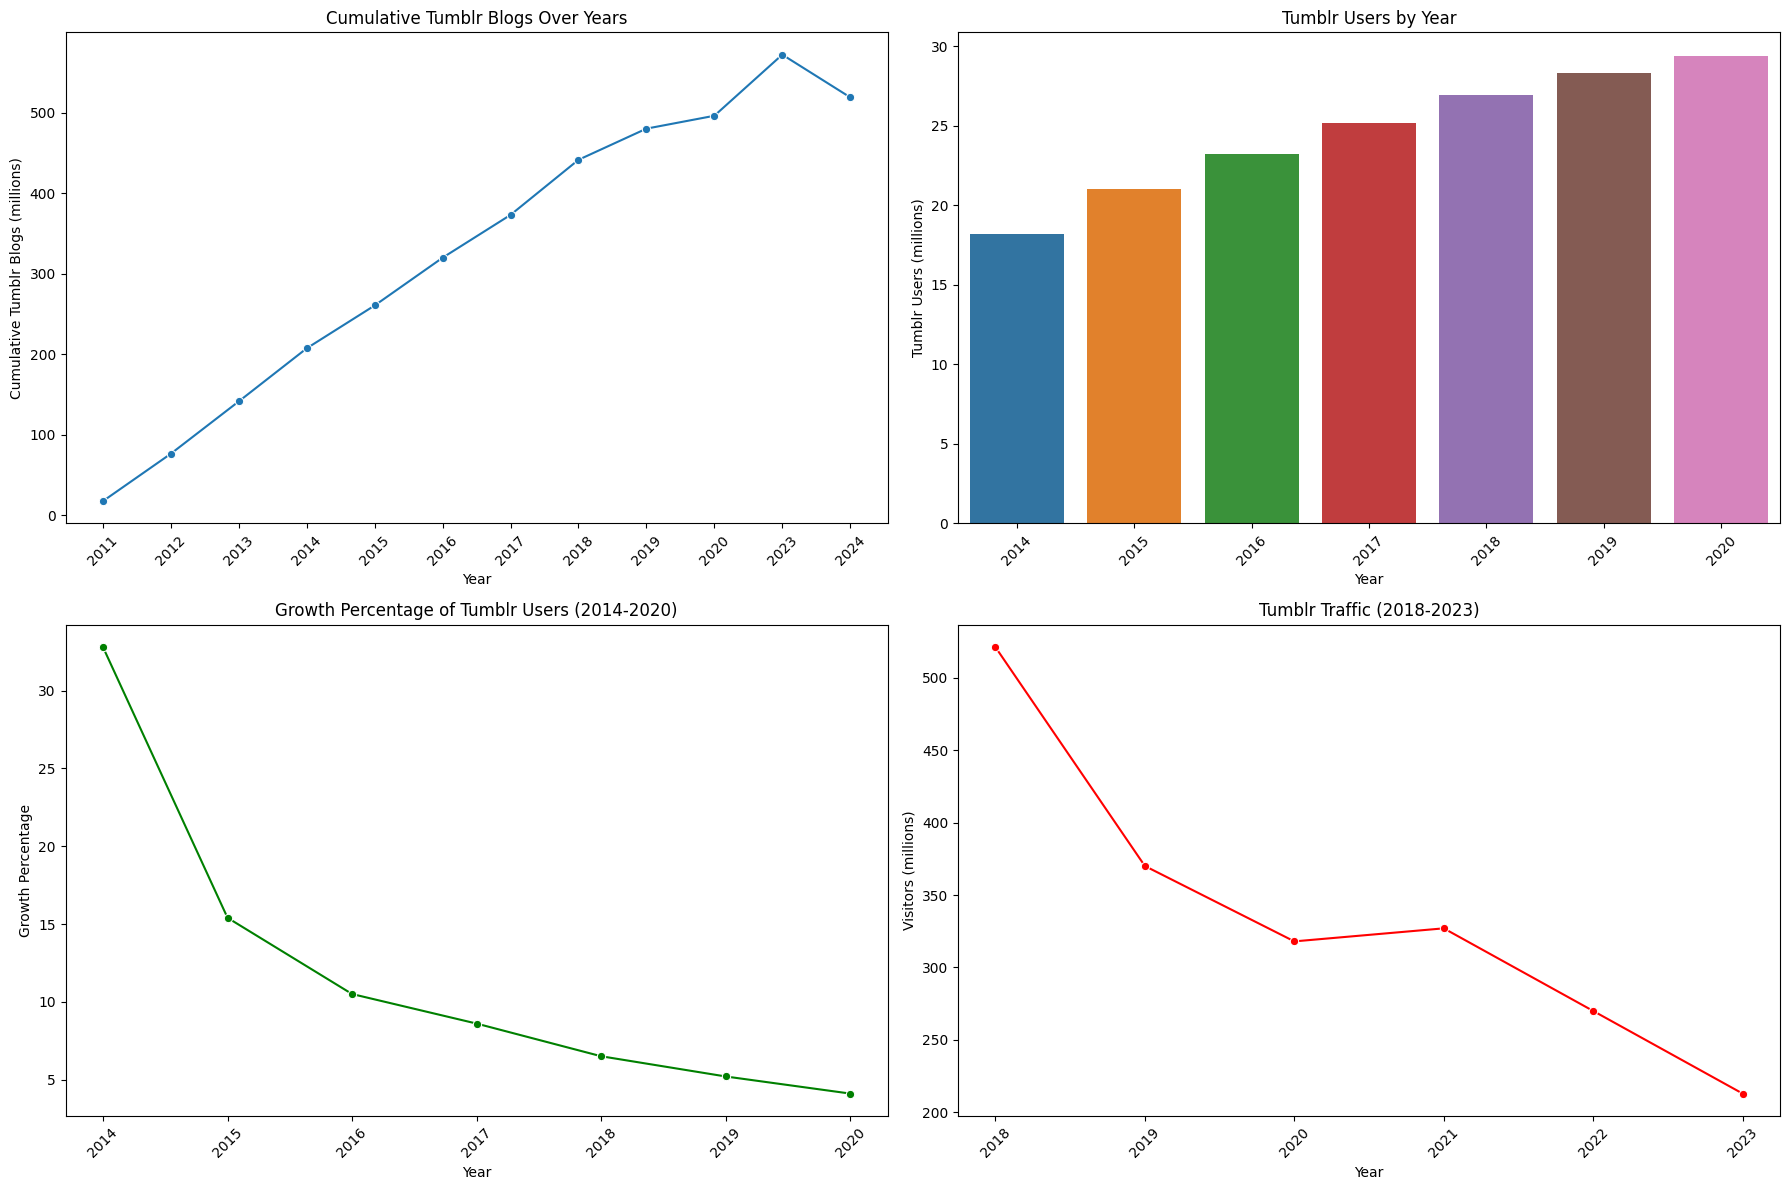

{'Cumulative Tumblr Blogs':        Cumulative Tumblr Blogs (millions)
 count                           12.000000
 mean                           325.375000
 std                            184.867334
 min                             17.500000
 25%                            190.825000
 50%                            346.400000
 75%                            484.100000
 max                            572.000000,
 'Tumblr Users':        Tumblr Users (millions)
 count                 7.000000
 mean                 24.600000
 std                   4.046809
 min                  18.200000
 25%                  22.100000
 50%                  25.200000
 75%                  27.600000
 max                  29.400000,
 'Growth Percentage':        Growth Percentage
 count           7.000000
 mean           11.871429
 std             9.973250
 min             4.100000
 25%             5.850000
 50%             8.600000
 75%            12.950000
 max            32.800000,
 'Tumblr Traffic':      

In [22]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cumulative Tumblr Blogs Over Years
blogs_data = {
    'Year': ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2023', '2024'],
    'Cumulative Tumblr Blogs (millions)': [17.5, 76.4, 141.4, 207.3, 260.5, 319.8, 373, 441.4, 480.1, 496.1, 572, 519]
}

# Demographic Information (Tumblr Users by Year)
users_data = {
    'Year': ['2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'Tumblr Users (millions)': [18.2, 21, 23.2, 25.2, 26.9, 28.3, 29.4]
}

# Tumblr Users Growth from 2014 to 2020
growth_data = {
    'Year': ['2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'Growth Percentage': [32.8, 15.4, 10.5, 8.6, 6.5, 5.2, 4.1]
}

# Tumblr Traffic from 2018 to 2023
traffic_data = {
    'Year': ['2018', '2019', '2020', '2021', '2022', '2023'],
    'Visitors (millions)': [521, 370, 318, 327, 270, 213]
}

# Converting dictionaries to DataFrames
df_blogs = pd.DataFrame(blogs_data)
df_users = pd.DataFrame(users_data)
df_growth = pd.DataFrame(growth_data)
df_traffic = pd.DataFrame(traffic_data)

# Summary Statistics
summary_stats = {
    "Cumulative Tumblr Blogs": df_blogs.describe(),
    "Tumblr Users": df_users.describe(),
    "Growth Percentage": df_growth.describe(),
    "Tumblr Traffic": df_traffic.describe()
}

# Visualization
plt.figure(figsize=(18, 12))

# Cumulative Tumblr Blogs Over Years
plt.subplot(2, 2, 1)
sns.lineplot(data=df_blogs, x='Year', y='Cumulative Tumblr Blogs (millions)', marker='o')
plt.title('Cumulative Tumblr Blogs Over Years')
plt.xticks(rotation=45)

# Tumblr Users by Year
plt.subplot(2, 2, 2)
sns.barplot(data=df_users, x='Year', y='Tumblr Users (millions)')
plt.title('Tumblr Users by Year')
plt.xticks(rotation=45)

# Growth Percentage of Tumblr Users (2014-2020)
plt.subplot(2, 2, 3)
sns.lineplot(data=df_growth, x='Year', y='Growth Percentage', marker='o', color='green')
plt.title('Growth Percentage of Tumblr Users (2014-2020)')
plt.xticks(rotation=45)

# Tumblr Traffic (2018-2023)
plt.subplot(2, 2, 4)
sns.lineplot(data=df_traffic, x='Year', y='Visitors (millions)', marker='o', color='red')
plt.title('Tumblr Traffic (2018-2023)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

summary_stats


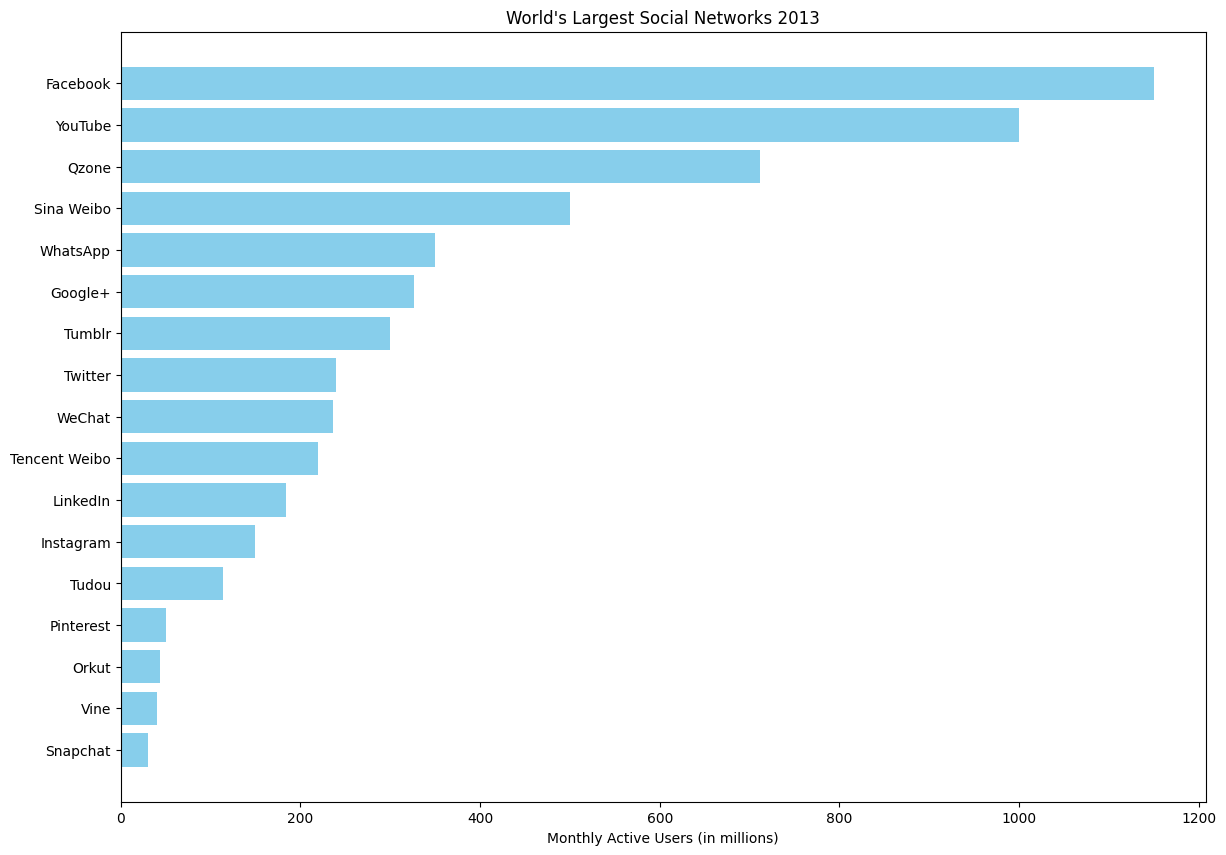

In [23]:
import matplotlib.pyplot as plt

# Social networks and their MAUs as of Oct. 30, 2013
social_networks = [
    "Facebook", "YouTube", "Qzone", "Sina Weibo", "WhatsApp", "Google+", "Tumblr", "Twitter", "WeChat", "Tencent Weibo", "LinkedIn", "Instagram", 
    "Tudou", "Pinterest", "Orkut", "Vine", "Snapchat"
]
maus = [
    1150, 1000, 712, 500, 350, 327, 300, 240, 236, 220, 184, 150, 
    114, 50, 44, 40, 30 
]

# Plot
plt.figure(figsize=(14, 10))
plt.barh(social_networks, maus, color='skyblue')
plt.xlabel('Monthly Active Users (in millions)')
plt.title('World\'s Largest Social Networks 2013')
plt.gca().invert_yaxis() 
plt.show()
